<a href="https://colab.research.google.com/github/wjdgoruds2/AI-_assignment/blob/master/Pytorch_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

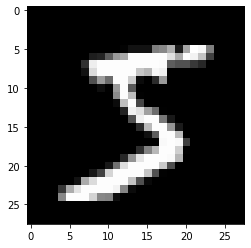

이미지 레이블:5


In [7]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1,cache=True)

X=mnist.data/255
y=mnist.target

import matplotlib.pyplot as plt
plt.imshow(X[0].reshape(28,28),cmap='gray')
plt.show()
print("이미지 레이블:{}".format(y[0]))

import torch 
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7,random_state=0)
X_train=torch.Tensor(X_train)
X_test=torch.Tensor(X_test)
y_train=torch.LongTensor(list(map(int,y_train)))
y_test=torch.LongTensor(list(map(int,y_test)))

ds_train=TensorDataset(X_train,y_train)
ds_test=TensorDataset(X_test,y_test)

loader_train=DataLoader(ds_train,batch_size=64,shuffle=True)
loader_test=DataLoader(ds_test,batch_size=64,shuffle=False)

from torch import nn
model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc23',nn.Linear(100,100))

from torch import optim
loss_fn=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

def train(epoch):
  model.train()
  for data,targets in loader_train:
    optimizer.zero_grad()
    outputs=model(data)
    loss=loss_fn(outputs,targets)
    loss.backward()
    optimizer.step()
  print('에포크{}:완료'.format(epoch))

  def test(head):
    model.eval()
    correct=0
    with torch.no_grad():
      for data,targets in loader_test:
        outputs=model(data)
        predicted=torch.max(outputs.data,1)
        correct+=predicted.eq(targets.data.view_as(predicted)).sum()
    data_num=len(loader_test.dataset)
    print('{}정확도:{}/{}({:.0f}%)'.format(head,correct,data_num,100.*correct/data_num))
  test('시작')
  for epoch in range(3):
    train(epoch)
    test('학습중')
  test('학습 후')

  index=10
  model.eval()
  data=X_test[index]
  output=model(data)
  print('{}번째 학습데이터의 테스트 결과:{}'.format(index,output))
  predicted=torch.max(output.data,0)
  print('{}번째 데이터의 예측:{}'.format(index,predicted))
  X_test_show=(X_test[index]).numpy()
  plt.imshow(X_test_show.reshape(28,28),cmap='gray')
  print('실제 레이블:{}'.format(y_test[index]))